In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from ucimlrepo import fetch_ucirepo

In [2]:
# Загрузка датасета
dataset = fetch_ucirepo(id=17)

In [3]:
# Преобразование данных в DataFrame
# Данные о признаках (features) и метках (targets)
X = dataset.data['features']  # Признаки
y = dataset.data['targets']['Diagnosis'].replace({'M': 1, 'B': 0}).astype(int)  # Метки с заменой 'M' -> 1 и 'B' -> 0

In [4]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразуем тип данных меток в int
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [5]:
# Стандартизация данных (очень важно для KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [7]:
# Предсказание на тестовой выборке
y_pred = knn.predict(X_test_scaled)

In [8]:
# Оценка модели
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))


Матрица ошибок:
[[68  3]
 [ 3 40]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [9]:
# Подбор оптимального значения k
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    error = np.mean(y_pred_k != y_test)
    error_rates.append(error)

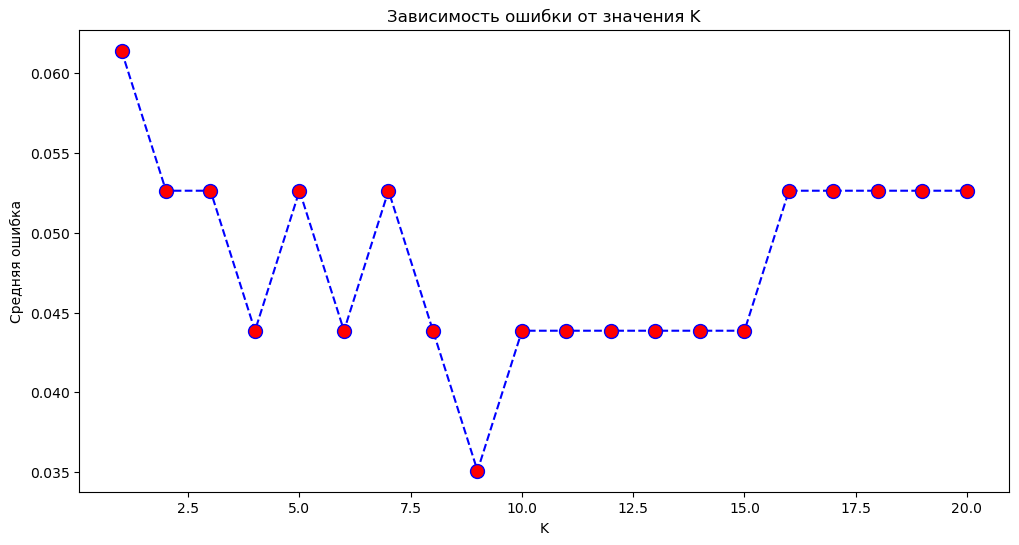

In [10]:
# Визуализация ошибки в зависимости от k
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Зависимость ошибки от значения K')
plt.xlabel('K')
plt.ylabel('Средняя ошибка')
plt.show()

In [11]:
# Обучение модели с оптимальным k
optimal_k = error_rates.index(min(error_rates)) + 1
print(f"\nОптимальное значение K: {optimal_k}")

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# Предсказания с оптимальным k
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# Оценка модели с оптимальным k
print("\nМатрица ошибок с оптимальным K:")
print(confusion_matrix(y_test, y_pred_optimal))

print("\nОтчет о классификации с оптимальным K:")
print(classification_report(y_test, y_pred_optimal))


Оптимальное значение K: 9

Матрица ошибок с оптимальным K:
[[69  2]
 [ 2 41]]

Отчет о классификации с оптимальным K:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### Выводы

1. **Оценка модели KNN с 5 соседями:**
   - Модель с числом ближайших соседей `k=5` продемонстрировала хорошие результаты классификации на тестовых данных.
   - Основные метрики:
     - **Точность (Accuracy)**: показывает долю правильных предсказаний среди всех данных.
     - **Точность по классу (Precision)**: доля истинно положительных среди всех предсказанных положительных.
     - **Полнота (Recall)**: доля правильно предсказанных положительных среди всех истинно положительных случаев.
     - **F1-меру**: среднее гармоническое между точностью и полнотой.

2. **Оптимальное значение `k`:**
   - Подбор значений `k` от 1 до 20 позволил выбрать оптимальное значение, при котором минимизируется ошибка классификации.
   - График зависимости ошибки от `k` показал, что с увеличением числа соседей ошибка сначала снижается, а затем снова увеличивается.

3. **Влияние `k` на модель:**
   - При малых значениях `k` (например, 1), модель становится слишком чувствительной к шуму в данных, что может привести к переобучению.
   - При больших значениях `k` (например, 15-20), модель становится слишком сглаженной и теряет важные детали в данных, что снижает точность.

4. **Преимущества KNN:**
   - Простота реализации и отсутствие предположений о распределении данных делают алгоритм удобным для задач классификации.
   - Хорошо работает на малых и средних объемах данных с правильной предварительной обработкой (например, стандартизацией признаков).

5. **Ограничения KNN:**
   - KNN может быть медленным при большом количестве данных, так как для каждого предсказания нужно вычислять расстояния до всех соседей.
   - Чувствительность к масштабу признаков и выбросам требует предварительной обработки данных (например, стандартизации).

6. **Возможные улучшения:**
   - **Кросс-валидация** может помочь в более надежной оценке модели.
   - **Использование других алгоритмов** классификации (например, Random Forest, SVM) для сравнения с KNN.
   - **Сокращение признаков** с помощью анализа важности, что может улучшить производительность модели.

### Итог:
Модель KNN с оптимальным значением `k` показала хорошие результаты в задаче предсказания рака груди. Однако для больших объемов данных или шумных данных могут потребоваться более мощные модели, такие как Random Forest или SVM.
